# Clustering in the Iris dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
from pyspark.sql import SparkSession
from pyspark.mllib.clustering import KMeans, KMeansModel

In [3]:
spark = SparkSession.builder\
        .master("spark://spark-master:7077")\
        .appName("Clustering")\
        .getOrCreate()
spark

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/03/17 20:42:30 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [4]:
sc=spark.sparkContext

In [5]:
data_path="/home/data"

In [6]:
def dropFirstRow(index,iterator):
     return iter(list(iterator)[1:]) 

In [21]:
dataRDDs = sc.textFile(data_path+"/Iris.csv").map(lambda line : line.split(","))
dataRDDs = dataRDDs.mapPartitionsWithIndex(dropFirstRow)
parsedData = dataRDDs.map(lambda line: np.array([float(x) for x in line[1:5]]))

In [22]:
parsedData.take(5)

[array([5.1, 3.5, 1.4, 0.2]),
 array([4.9, 3. , 1.4, 0.2]),
 array([4.7, 3.2, 1.3, 0.2]),
 array([4.6, 3.1, 1.5, 0.2]),
 array([5. , 3.6, 1.4, 0.2])]

In [25]:
clusters = KMeans.train(parsedData, 3, maxIterations=20, initializationMode="random")

In [26]:
predictions=clusters.predict(parsedData).collect()

In [27]:
data=parsedData.collect()

In [28]:
x_values=[x[0] for x in data]
y_values=[x[1] for x in data]

Text(0, 0.5, 'SepalWidthCm')

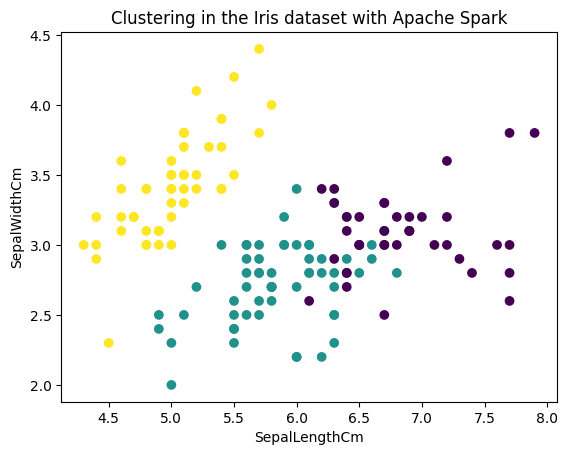

In [29]:
#plt.figure(figsize=(10,6))
plt.scatter(x_values,y_values,c=predictions)
plt.title("Clustering in the Iris dataset with Apache Spark")
plt.xlabel("SepalLengthCm")
plt.ylabel("SepalWidthCm")